In [225]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [226]:
train = pd.read_csv("D:\\Python\\Loan Predction AV\\train.csv")
test = pd.read_csv("D:\\Python\\Loan Predction AV\\test.csv")

In [227]:
print train.shape, test.shape

(614, 13) (367, 12)


In [228]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print train.shape, test.shape, data.shape

(614, 14) (367, 13) (981, 14)


In [229]:
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [230]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [231]:
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
source                 2
dtype: int64

In [232]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [233]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
numerical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='float64' or data.dtypes[x]=='int64']
categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID','source']]
for col in categorical_columns:
    print "\nFrequencey of categoris for variable %s" %col
    print data[col].value_counts()


Frequencey of categoris for variable Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

Frequencey of categoris for variable Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequencey of categoris for variable Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequencey of categoris for variable Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequencey of categoris for variable Married
Yes    631
No     347
Name: Married, dtype: int64

Frequencey of categoris for variable Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequencey of categoris for variable Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64


In [234]:
#numerical_columns.apply(lambda x: sum(x.isnull()))
#data._get_numeric_data()
numerics = ['int64','float64']
categorical = ['object']
numdf = data.select_dtypes(include=numerics)
catdf = data.select_dtypes(include=categorical)
catdf.head()

,Dependents,Education,Gender,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,0,Graduate,Male,LP001002,Y,No,Urban,No,train
1,1,Graduate,Male,LP001003,N,Yes,Rural,No,train
2,0,Graduate,Male,LP001005,Y,Yes,Urban,Yes,train
3,0,Not Graduate,Male,LP001006,Y,Yes,Urban,No,train
4,0,Graduate,Male,LP001008,Y,No,Urban,No,train


In [235]:
numdf.fillna(numdf.mean(), inplace=True)
numdf.apply(lambda x: sum(x.isnull()))

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [236]:
#You can use df = df.fillna(df['Label'].value_counts().index[0]) to fill NaNs with the most frequent value from one column.
#If you want to fill every column with its own most frequent value you can use
#df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
#del catdf['column_name']
catdf = catdf.apply(lambda x:x.fillna(x.value_counts().index[0]))
catdf.apply(lambda x: sum(x.isnull()))

Dependents       0
Education        0
Gender           0
Loan_ID          0
Loan_Status      0
Married          0
Property_Area    0
Self_Employed    0
source           0
dtype: int64

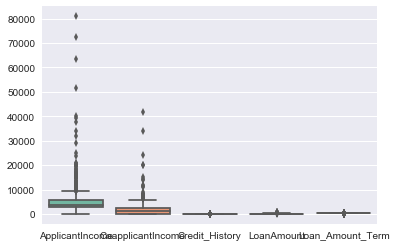

In [237]:
import seaborn as sns
#iris = sns.load_dataset("iris")
ax = sns.boxplot(data=numdf, orient="v", palette="Set2")

In [479]:
import matplotlib.pyplot as plt
%matplotlib inline

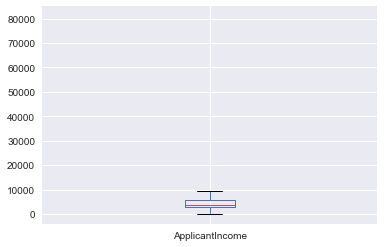

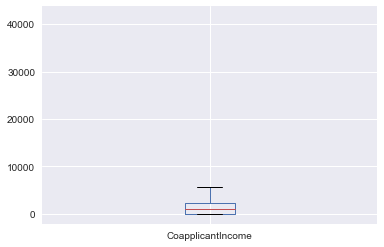

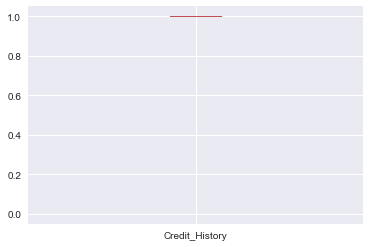

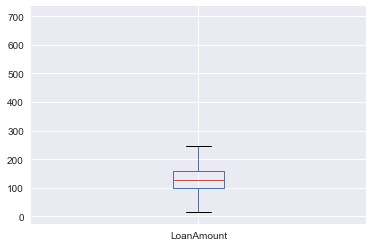

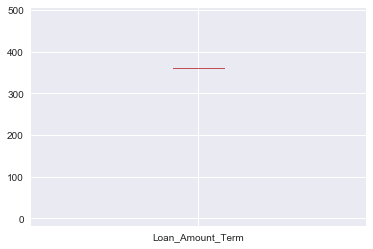

In [478]:
for x in numdf:
    numdf.boxplot(x)
    plt.figure()

In [ ]:
numdf[numdf.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [443]:
from sklearn import preprocessing

data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LTRatio'] = data['LoanAmount'] / data['TotalIncome']

In [448]:
data.drop(['LTRatio_log',],axis=1,inplace=True)
data.dtypes

Loan_ID               object
source                object
Dependents             int64
Education              int64
Gender                 int64
Loan_Status            int64
Married                int64
Property_Area          int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
LoanAmount           float64
Loan_Amount_Term     float64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
LTRatio              float64
dtype: object

In [243]:
from sklearn import preprocessing
label = catdf[['Dependents','Education','Gender','Loan_Status','Married','Property_Area','Self_Employed']]
label2 = catdf[['Loan_ID','source']]

for column in label.columns:
    le = preprocessing.LabelEncoder()
    label[column] = le.fit_transform(label[column])

C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [449]:
new_var = data[['TotalIncome_log','LoanAmount_log','LTRatio']]

In [450]:
data = pd.concat([label2, label, numdf, new_var], axis=1)

In [451]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [452]:
print label.shape, label2.shape, numdf.shape, data.shape,train.shape, test.shape, data.head(), 

(981, 7) (981, 2) (981, 5) (981, 17) (614, 17) (367, 17)     Loan_ID source  Dependents  Education  Gender  Loan_Status  Married  \
0  LP001002  train           0          0       1            1        0   
1  LP001003  train           1          0       1            0        1   
2  LP001005  train           0          0       1            1        1   
3  LP001006  train           0          1       1            1        1   
4  LP001008  train           0          0       1            1        0   

   Property_Area  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0              2              0             5849                0.0   
1              0              0             4583             1508.0   
2              2              1             3000                0.0   
3              2              0             2583             2358.0   
4              2              0             6000                0.0   

   Credit_History  LoanAmount  Loan_Amount_Term  TotalIncome_log 

In [453]:
test.drop(['Loan_Status','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [455]:
train.head()

,Loan_ID,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,TotalIncome_log,LoanAmount_log,LTRatio
0,LP001002,0,0,1,1,0,2,0,5849,0.0,1.0,142.51153,360.0,8.674026,4.959423,0.024365
1,LP001003,1,0,1,0,1,0,0,4583,1508.0,1.0,128.00000,360.0,8.714568,4.852030,0.021015
2,LP001005,0,0,1,1,1,2,1,3000,0.0,1.0,66.00000,360.0,8.006368,4.189655,0.022000
3,LP001006,0,1,1,1,1,2,0,2583,2358.0,1.0,120.00000,360.0,8.505323,4.787492,0.024287
4,LP001008,0,0,1,1,0,2,0,6000,0.0,1.0,141.00000,360.0,8.699515,4.948760,0.023500


In [465]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
target = 'Loan_Status'
IDcol = ['Loan_ID']

def classification_model(model,dtrain,dtest,predictors,target,IDcol,filename):
  #Fit the model:
  model.fit(dtrain[predictors],dtrain[target])
  
  #Make predictions on training set:
  predictions = model.predict(dtrain[predictors])
  cm = ConfusionMatrix(dtrain[target], predictions)
  cm.print_stats()
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,dtrain[target])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(dtrain.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (dtrain[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = dtrain[target].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(dtrain[predictors].iloc[test,:], dtrain[target].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(dtrain[predictors],dtrain[target])  
    
    
  #Predict on testing data:
  dtest[target] = model.predict(dtest[predictors])
  #predicted= model.predict(y_test) 
  #Export submission file:
  IDcol.append(target)
  submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
  submission['Loan_Status'] = submission['Loan_Status'].map({0:'N', 1:'Y'})
  submission.to_csv(filename, index=False)



In [466]:
model1 = LogisticRegression()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount']
classification_model(model1,train,test,predictor_var,target,IDcol,'logistic.csv')

population: 614
P: 422
N: 192
PositiveTest: 524
NegativeTest: 90
TP: 414
TN: 82
FP: 110
FN: 8
TPR: 0.981042654028
TNR: 0.427083333333
PPV: 0.790076335878
NPV: 0.911111111111
FPR: 0.572916666667
FDR: 0.209923664122
FNR: 0.0189573459716
ACC: 0.807817589577
F1_score: 0.875264270613
MCC: 0.534951230607
informedness: 0.408125987362
markedness: 0.701187446989
prevalence: 0.687296416938
LRP: 1.71236535976
LRN: 0.044387932031
DOR: 38.5772727273
FOR: 0.0888888888889
Accuracy : 80.782%
Cross-Validation Score : 80.784%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [467]:
model2 = LogisticRegression()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','TotalIncome_log','LoanAmount_log','LTRatio']
classification_model(model2,train,test,predictor_var,target,IDcol,'logistic2.csv')

population: 614
P: 422
N: 192
PositiveTest: 524
NegativeTest: 90
TP: 414
TN: 82
FP: 110
FN: 8
TPR: 0.981042654028
TNR: 0.427083333333
PPV: 0.790076335878
NPV: 0.911111111111
FPR: 0.572916666667
FDR: 0.209923664122
FNR: 0.0189573459716
ACC: 0.807817589577
F1_score: 0.875264270613
MCC: 0.534951230607
informedness: 0.408125987362
markedness: 0.701187446989
prevalence: 0.687296416938
LRP: 1.71236535976
LRN: 0.044387932031
DOR: 38.5772727273
FOR: 0.0888888888889
Accuracy : 80.782%
Cross-Validation Score : 80.784%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [468]:
model3 = LogisticRegression()
predictor_var = ['Credit_History','Dependents','Property_Area','Loan_Amount_Term','TotalIncome_log','LoanAmount_log','LTRatio']
classification_model(model3,train,test,predictor_var,target,IDcol,'logistic3.csv')

population: 614
P: 422
N: 192
PositiveTest: 525
NegativeTest: 89
TP: 415
TN: 82
FP: 110
FN: 7
TPR: 0.983412322275
TNR: 0.427083333333
PPV: 0.790476190476
NPV: 0.921348314607
FPR: 0.572916666667
FDR: 0.209523809524
FNR: 0.0165876777251
ACC: 0.809446254072
F1_score: 0.876451953537
MCC: 0.540556071922
informedness: 0.410495655608
markedness: 0.711824505083
prevalence: 0.687296416938
LRP: 1.71650150797
LRN: 0.0388394405271
DOR: 44.1948051948
FOR: 0.0786516853933
Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [469]:
rf1 = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','TotalIncome_log','LoanAmount_log','LTRatio']
classification_model(rf1,train,test,predictor_var,target,IDcol,'rf1.csv')

population: 614
P: 422
N: 192
PositiveTest: 422
NegativeTest: 192
TP: 422
TN: 192
FP: 0
FN: 0
TPR: 1.0
TNR: 1.0
PPV: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
ACC: 1.0
F1_score: 1.0
MCC: 1.0
informedness: 1.0
markedness: 1.0
prevalence: 0.687296416938
LRP: inf
LRN: 0.0
DOR: inf
FOR: 0.0
Accuracy : 100.000%
Cross-Validation Score : 78.502%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Credit_History      0.282680
LTRatio             0.184266
TotalIncome_log     0.178274
LoanAmount_log      0.154910
Dependents          0.043334
Property_Area       0.041672
Loan_Amount_Term    0.037598
Education           0.021077
Married             0.020778
Self_Employed       0.019567
Gender              0.015845
dtype: float64


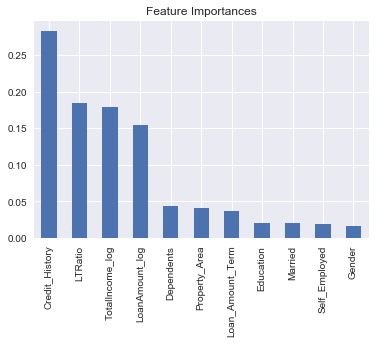

In [470]:
#Create a series with feature importances:
featimp = pd.Series(rf1.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp
featimp.plot(kind='bar', title='Feature Importances')

In [471]:
rf2 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(rf2,train,test,predictor_var,target,IDcol,'rf2.csv')

population: 614
P: 422
N: 192
PositiveTest: 516
NegativeTest: 98
TP: 415
TN: 91
FP: 101
FN: 7
TPR: 0.983412322275
TNR: 0.473958333333
PPV: 0.804263565891
NPV: 0.928571428571
FPR: 0.526041666667
FDR: 0.195736434109
FNR: 0.0165876777251
ACC: 0.824104234528
F1_score: 0.884861407249
MCC: 0.578944921275
informedness: 0.457370655608
markedness: 0.732834994463
prevalence: 0.687296416938
LRP: 1.86945708789
LRN: 0.0349981771783
DOR: 53.4158415842
FOR: 0.0714285714286
Accuracy : 82.410%
Cross-Validation Score : 80.945%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [472]:
rf3 = RandomForestClassifier(n_estimators =500, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
predictor_var = ['LoanAmount','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(rf3,train,test,predictor_var,target,IDcol,'rf3.csv')

population: 614
P: 422
N: 192
PositiveTest: 432
NegativeTest: 182
TP: 417
TN: 177
FP: 15
FN: 5
TPR: 0.988151658768
TNR: 0.921875
PPV: 0.965277777778
NPV: 0.972527472527
FPR: 0.078125
FDR: 0.0347222222222
FNR: 0.0118483412322
ACC: 0.967426710098
F1_score: 0.976580796253
MCC: 0.923811549241
informedness: 0.910026658768
markedness: 0.937805250305
prevalence: 0.687296416938
LRP: 12.6483412322
LRN: 0.0128524379468
DOR: 984.12
FOR: 0.0274725274725
Accuracy : 96.743%
Cross-Validation Score : 73.456%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [477]:
rf4 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','LTRatio','Credit_History','Dependents','Property_Area']
classification_model(rf4,train,test,predictor_var,target,IDcol,'rf42.csv')

population: 614
P: 422
N: 192
PositiveTest: 500
NegativeTest: 114
TP: 410
TN: 102
FP: 90
FN: 12
TPR: 0.971563981043
TNR: 0.53125
PPV: 0.82
NPV: 0.894736842105
FPR: 0.46875
FDR: 0.18
FNR: 0.0284360189573
ACC: 0.833876221498
F1_score: 0.889370932755
MCC: 0.59948284127
informedness: 0.502813981043
markedness: 0.714736842105
prevalence: 0.687296416938
LRP: 2.07266982622
LRN: 0.0535266239197
DOR: 38.7222222222
FOR: 0.105263157895
Accuracy : 83.388%
Cross-Validation Score : 80.457%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [474]:
rf5 = RandomForestClassifier(n_estimators =500, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
predictor_var = ['TotalIncome_log','LoanAmount_log','LTRatio','Credit_History','Dependents']
classification_model(rf5,train,test,predictor_var,target,IDcol,'rf5.csv')

population: 614
P: 422
N: 192
PositiveTest: 422
NegativeTest: 192
TP: 422
TN: 192
FP: 0
FN: 0
TPR: 1.0
TNR: 1.0
PPV: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
ACC: 1.0
F1_score: 1.0
MCC: 1.0
informedness: 1.0
markedness: 1.0
prevalence: 0.687296416938
LRP: inf
LRN: 0.0
DOR: inf
FOR: 0.0
Accuracy : 100.000%
Cross-Validation Score : 77.524%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [336]:
#!pip install xgboost

No files/directories in c:\users\suhas\appdata\local\temp\pip-build-usest0\xgboost\pip-egg-info (from PKG-INFO)


In [345]:
#https://stackoverflow.com/questions/35139108/how-to-install-xgboost-in-anaconda-python-windows-platform
import xgboost
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount']
classification_model(xgb1,train,test,predictor_var,target,IDcol,'xgb1.csv')

Accuracy : 85.179%
Cross-Validation Score : 78.662%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [346]:
from xgboost.sklearn import XGBClassifier
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

predictor_var = ['LoanAmount','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(xgb2,train,test,predictor_var,target,IDcol,'xgb2.csv')

Accuracy : 82.410%
Cross-Validation Score : 80.293%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [462]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

predictor_var = ['TotalIncome_log','LoanAmount_log','LTRatio','Credit_History','Dependents']
classification_model(xgb3,train,test,predictor_var,target,IDcol,'xgb3.csv')

Accuracy : 88.599%
Cross-Validation Score : 79.316%


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
